In [15]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scienceplots
# %matplotlib widget
import pickle
plt.style.use(['science', 'nature'])

In [16]:
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.rcParams['axes.labelsize'] = 6
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.right"] = False
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["legend.fontsize"] = 5
plt.rcParams['hatch.linewidth'] = 0.5

mm=1/25.4

color = [
    "#386b98",
    "#269a51",
    "#edaa4d",
    "#d34123",
    "#7e648a",
    "#454545",
    "#929292",
]
palette=sns.color_palette(color, 7)
tool_map = {
    "scapa": "scAPA",
    "scapatrap": "scAPAtrap",
    "sierra": "Sierra",
    "maaper": "MAAPER",
    "scapture": "SCAPTURE",
    "scape": "SCAPE",
    "infernape": "Infernape",
}
tool_order = ["SCAPE", "scAPAtrap", "Infernape", "SCAPTURE", "scAPA","Sierra"]

In [17]:
cp_df = pd.read_csv('/root/apabenchmark/data/cp_performance/result.tsv', sep='\t')
cp_df["min"] = cp_df["runtime"] / 60
cp_df["tool"] = cp_df["tool"].map(tool_map)

/tmp/ipykernel_787499/606681176.py:12: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_787499/606681176.py:12: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_787499/606681176.py:12: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_787499/606681176.py:12: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(


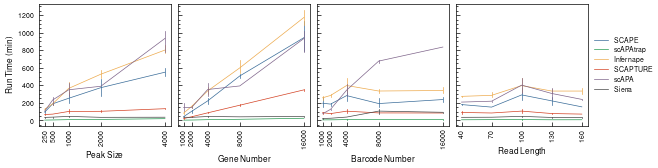

In [24]:
gn_pf_list = [1000, 2000, 4000, 8000, 16000]
ps_pf_list = [250, 500, 1000, 2000, 4000]
barcode_num_list = [1000, 2000, 4000, 8000, 16000]
read_length_list = [40, 70, 100, 130, 160]

plt.close()
fig, axs = plt.subplots(1,4, figsize=(180*mm, 40*mm), sharey=True)
legend_flag = False
for i, x_var in enumerate(["peak_size", "gene_number", "barcode_number", "read_length"]):
    if i == 3:
        legend_flag = True
    sns.lineplot(
        data=cp_df, x=x_var, y="min", hue="tool", ax=axs[i], palette=palette, err_style="bars", hue_order=tool_order,linewidth=0.5, legend=legend_flag
    )
    # axs[i].set_yscale("log")
    # axs[i].set_xscale("log")
    axs[i].tick_params(which="minor", bottom=False )
axs[3].set_xscale("linear")
axs[0].set_ylabel("Run Time (min)")
axs[0].set_xticks(ps_pf_list)
axs[1].set_xticks(gn_pf_list)
axs[2].set_xticks(barcode_num_list)
axs[3].set_xticks(read_length_list)
axs[0].set_xticklabels(ps_pf_list, rotation=90)
axs[1].set_xticklabels(gn_pf_list, rotation=90)
axs[2].set_xticklabels(barcode_num_list, rotation=90)
axs[3].set_xticklabels(read_length_list, rotation=90)
axs[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))


axs[0].set_xlabel("Peak Size")
axs[1].set_xlabel("Gene Number")
axs[2].set_xlabel("Barcode Number")
axs[3].set_xlabel("Read Length")
plt.subplots_adjust(wspace=0.05)
plt.savefig("/root/apabenchmark/plot/fig7/runtime.pdf", bbox_inches='tight', dpi=300)
plt.show()


/tmp/ipykernel_787499/1261275561.py:7: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_787499/1261275561.py:7: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_787499/1261275561.py:7: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_787499/1261275561.py:7: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(


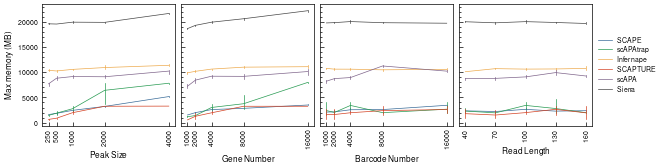

In [19]:
plt.close()
fig, axs = plt.subplots(1,4, figsize=(180*mm, 40*mm), sharey=True)
legend_flag = False
for i, x_var in enumerate(["peak_size", "gene_number", "barcode_number", "read_length"]):
    if i == 3:
        legend_flag = True
    sns.lineplot(
        data=cp_df, x=x_var, y="max_mem", hue="tool", ax=axs[i], palette=palette, err_style="bars", hue_order=tool_order,linewidth=0.5, legend=legend_flag
    )
    axs[i].tick_params(which="minor", bottom=False )

axs[0].set_ylabel("Max memory (MB)")
axs[0].set_xticks(ps_pf_list)
axs[1].set_xticks(gn_pf_list)
axs[2].set_xticks(barcode_num_list)
axs[3].set_xticks(read_length_list)
axs[0].set_xticklabels(ps_pf_list, rotation=90)
axs[1].set_xticklabels(gn_pf_list, rotation=90)
axs[2].set_xticklabels(barcode_num_list, rotation=90)
axs[3].set_xticklabels(read_length_list, rotation=90)
axs[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlabel("Peak Size")
axs[1].set_xlabel("Gene Number")
axs[2].set_xlabel("Barcode Number")
axs[3].set_xlabel("Read Length")

plt.subplots_adjust(wspace=0.05)
plt.savefig("/root/apabenchmark/plot/fig7/max_mem.pdf", bbox_inches='tight', dpi=300)
plt.show()


/tmp/ipykernel_787499/2375229753.py:7: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_787499/2375229753.py:7: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_787499/2375229753.py:7: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_787499/2375229753.py:7: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(


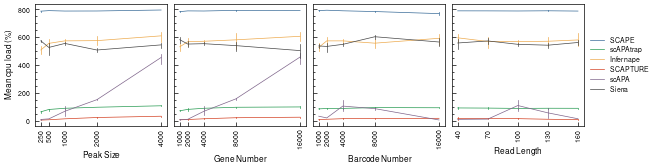

In [20]:
plt.close()
fig, axs = plt.subplots(1,4, figsize=(180*mm, 40*mm), sharey=True)
legend_flag = False
for i, x_var in enumerate(["peak_size", "gene_number", "barcode_number", "read_length"]):
    if i == 3:
        legend_flag = True
    sns.lineplot(
        data=cp_df, x=x_var, y="mean_load", hue="tool", ax=axs[i], palette=palette, err_style="bars", hue_order=tool_order,linewidth=0.5, legend=legend_flag
    )
    axs[i].tick_params(which="minor", bottom=False )


axs[0].set_xticks(ps_pf_list)
axs[1].set_xticks(gn_pf_list)
axs[2].set_xticks(barcode_num_list)
axs[3].set_xticks(read_length_list)
axs[0].set_xticklabels(ps_pf_list, rotation=90)
axs[1].set_xticklabels(gn_pf_list, rotation=90)
axs[2].set_xticklabels(barcode_num_list, rotation=90)
axs[3].set_xticklabels(read_length_list, rotation=90)
axs[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_ylabel("Mean cpu load (\%)")
axs[0].set_xlabel("Peak Size")
axs[1].set_xlabel("Gene Number")
axs[2].set_xlabel("Barcode Number")
axs[3].set_xlabel("Read Length")
plt.subplots_adjust(wspace=0.05)
plt.savefig("/root/apabenchmark/plot/fig7/cpu_load.pdf", bbox_inches='tight', dpi=300)
plt.show()
